# Лайт

## Вариант 1

In [ ]:
from tensorflow.keras.datasets import mnist, cifar10, cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Dropout, MaxPooling2D, Flatten
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adadelta, Adam
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image
# from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
import os
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


Epoch 1/15
469/469 [==============================] - 55s 117ms/step - loss: 0.1606 - accuracy: 0.9503 - val_loss: 0.0454 - val_accuracy: 0.9857
Epoch 2/15
469/469 [==============================] - 54s 115ms/step - loss: 0.0525 - accuracy: 0.9837 - val_loss: 0.0363 - val_accuracy: 0.9889
Epoch 3/15
469/469 [==============================] - 52s 111ms/step - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.0310 - val_accuracy: 0.9897
Epoch 4/15
469/469 [==============================] - 52s 111ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0280 - val_accuracy: 0.9911
Epoch 5/15
469/469 [==============================] - 52s 112ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.0279 - val_accuracy: 0.9915
Epoch 6/15
469/469 [==============================] - 52s 112ms/step - loss: 0.0190 - accuracy: 0.9935 - val_loss: 0.0306 - val_accuracy: 0.9912
Epoch 7/15
469/469 [==============================] - 52s 112ms/step - loss: 0.0148 - accuracy: 0.9948 - val_loss: 0.0281 - val_ac

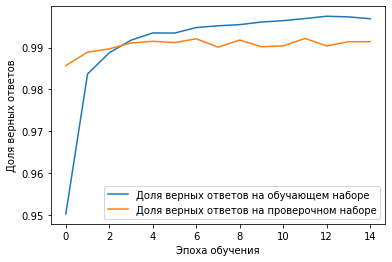

In [ ]:
batch_size = 128

model = Sequential()
model.add(BatchNormalization(input_shape = (28,28,1)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs=15,
                    validation_data = (x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], label = 'Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label = 'Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Вариант 2

### 1. 

In [ ]:
indexes = []
columns = ['accuracy', 'val_accuracy', 'test_accuracy']
model_list = []

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.4472 - accuracy: 0.8589 - val_loss: 0.1567 - val_accuracy: 0.9533
Epoch 2/15
469/469 [==============================] - 1s 3ms/step - loss: 0.2294 - accuracy: 0.9283 - val_loss: 0.1125 - val_accuracy: 0.9655
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1836 - accuracy: 0.9420 - val_loss: 0.0957 - val_accuracy: 0.9702
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1575 - accuracy: 0.9495 - val_loss: 0.0825 - val_accuracy: 0.9735
Epoch 5/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1419 - accuracy: 0.9549 - val_loss: 0.0711 - val_accuracy: 0.9778
Epoch 6/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1303 - accuracy: 0.9590 - val_loss: 0.0710 - val_accuracy: 0.9769
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1194 - accuracy: 0.9614 - val_loss: 0.0693 - val_accuracy: 0.9777
Epoch 

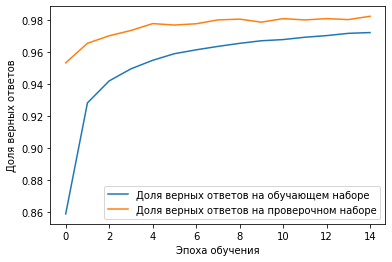

313/313 [==============================] - 1s 2ms/step - loss: 0.0517 - accuracy: 0.9824


In [ ]:
batch_size = 128

model = Sequential()
model.add(BatchNormalization(input_shape = (28,28,1)))
model.add(Conv2D(2, (3,3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs=15,
                    validation_data = (x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], label = 'Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label = 'Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

indexes.append('1 слой 2 нейрона')
model_list.append(history.history['accuracy'][-1])
model_list.append(history.history['val_accuracy'][-1])

scores = model.evaluate(x_test, y_test)
model_list.append(scores[1])

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.3319 - accuracy: 0.8953 - val_loss: 0.1049 - val_accuracy: 0.9675
Epoch 2/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1458 - accuracy: 0.9538 - val_loss: 0.0754 - val_accuracy: 0.9760
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1131 - accuracy: 0.9642 - val_loss: 0.0602 - val_accuracy: 0.9789
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0928 - accuracy: 0.9706 - val_loss: 0.0538 - val_accuracy: 0.9819
Epoch 5/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0821 - accuracy: 0.9740 - val_loss: 0.0524 - val_accuracy: 0.9829
Epoch 6/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0746 - accuracy: 0.9757 - val_loss: 0.0536 - val_accuracy: 0.9840
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0644 - accuracy: 0.9792 - val_loss: 0.0482 - val_accuracy: 0.9848
Epoch 

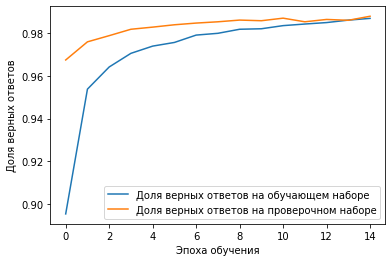

313/313 [==============================] - 1s 2ms/step - loss: 0.0381 - accuracy: 0.9880


In [ ]:
batch_size = 128

model = Sequential()
model.add(BatchNormalization(input_shape = (28,28,1)))
model.add(Conv2D(4, (3,3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs=15,
                    validation_data = (x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], label = 'Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label = 'Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

indexes.append('1 слой 4 нейрона')
model_list.append(history.history['accuracy'][-1])
model_list.append(history.history['val_accuracy'][-1])

scores = model.evaluate(x_test, y_test)
model_list.append(scores[1])

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2365 - accuracy: 0.9279 - val_loss: 0.0781 - val_accuracy: 0.9750
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0886 - accuracy: 0.9724 - val_loss: 0.0544 - val_accuracy: 0.9824
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0644 - accuracy: 0.9791 - val_loss: 0.0482 - val_accuracy: 0.9835
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0505 - accuracy: 0.9833 - val_loss: 0.0383 - val_accuracy: 0.9868
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0425 - accuracy: 0.9865 - val_loss: 0.0406 - val_accuracy: 0.9865
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0353 - accuracy: 0.9882 - val_loss: 0.0384 - val_accuracy: 0.9872
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0335 - accuracy: 0.9888 - val_loss: 0.0421 - val_accuracy: 0.9872
Epoch 

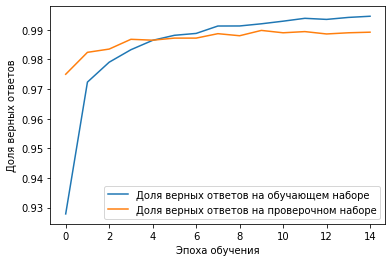

313/313 [==============================] - 1s 2ms/step - loss: 0.0415 - accuracy: 0.9892


In [ ]:
batch_size = 128

model = Sequential()
model.add(BatchNormalization(input_shape = (28,28,1)))
model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs=15,
                    validation_data = (x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], label = 'Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label = 'Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

indexes.append('1 слой 16 нейрона')
model_list.append(history.history['accuracy'][-1])
model_list.append(history.history['val_accuracy'][-1])

scores = model.evaluate(x_test, y_test)
model_list.append(scores[1])

### 2.

Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2229 - accuracy: 0.9341 - val_loss: 0.1015 - val_accuracy: 0.9694
Epoch 2/15
469/469 [==============================] - 3s 5ms/step - loss: 0.1035 - accuracy: 0.9682 - val_loss: 0.0780 - val_accuracy: 0.9768
Epoch 3/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0850 - accuracy: 0.9733 - val_loss: 0.0723 - val_accuracy: 0.9777
Epoch 4/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0787 - accuracy: 0.9749 - val_loss: 0.0741 - val_accuracy: 0.9771
Epoch 5/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0708 - accuracy: 0.9773 - val_loss: 0.0749 - val_accuracy: 0.9777
Epoch 6/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0669 - accuracy: 0.9789 - val_loss: 0.0828 - val_accuracy: 0.9764
Epoch 7/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0638 - accuracy: 0.9792 - val_loss: 0.0720 - val_accuracy: 0.9779
Epoch 

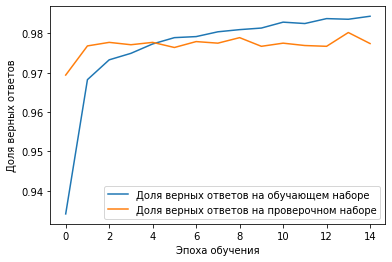

313/313 [==============================] - 1s 2ms/step - loss: 0.0836 - accuracy: 0.9774


In [ ]:
batch_size = 128

model = Sequential()
model.add(BatchNormalization(input_shape = (28,28,1)))
model.add(Conv2D(32, (3,3), padding='same', activation='linear'))
model.add(Conv2D(32, (3,3), padding='same', activation='linear'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='linear'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs=15,
                    validation_data = (x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], label = 'Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label = 'Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

indexes.append('relu - > linear')
model_list.append(history.history['accuracy'][-1])
model_list.append(history.history['val_accuracy'][-1])

scores = model.evaluate(x_test, y_test)
model_list.append(scores[1])

### 3.

Epoch 1/15
6000/6000 [==============================] - 18s 3ms/step - loss: 0.1191 - accuracy: 0.9640 - val_loss: 0.0377 - val_accuracy: 0.9873
Epoch 2/15
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0514 - accuracy: 0.9836 - val_loss: 0.0315 - val_accuracy: 0.9900
Epoch 3/15
6000/6000 [==============================] - 19s 3ms/step - loss: 0.0373 - accuracy: 0.9886 - val_loss: 0.0298 - val_accuracy: 0.9910
Epoch 4/15
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0.0301 - val_accuracy: 0.9907
Epoch 5/15
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0323 - val_accuracy: 0.9901
Epoch 6/15
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0448 - val_accuracy: 0.9886
Epoch 7/15
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.0307 - val_ac

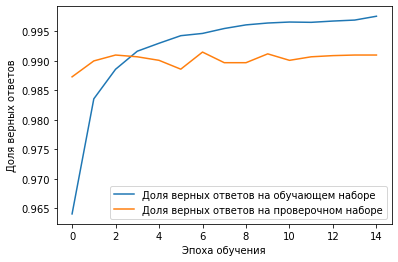

313/313 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9910


In [ ]:
batch_size = 10

model = Sequential()
model.add(BatchNormalization(input_shape = (28,28,1)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs=15,
                    validation_data = (x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], label = 'Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label = 'Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

indexes.append('batch_size = 10')
model_list.append(history.history['accuracy'][-1])
model_list.append(history.history['val_accuracy'][-1])

scores = model.evaluate(x_test, y_test)
model_list.append(scores[1])

Epoch 1/15
600/600 [==============================] - 3s 5ms/step - loss: 0.1455 - accuracy: 0.9550 - val_loss: 0.0416 - val_accuracy: 0.9863
Epoch 2/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0487 - accuracy: 0.9843 - val_loss: 0.0330 - val_accuracy: 0.9886
Epoch 3/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0298 - val_accuracy: 0.9907
Epoch 4/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0312 - val_accuracy: 0.9904
Epoch 5/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0213 - accuracy: 0.9926 - val_loss: 0.0309 - val_accuracy: 0.9905
Epoch 6/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0.0302 - val_accuracy: 0.9919
Epoch 7/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.0301 - val_accuracy: 0.9915
Epoch 

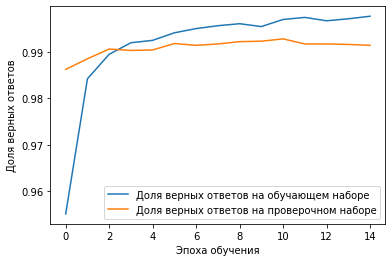

313/313 [==============================] - 1s 2ms/step - loss: 0.0329 - accuracy: 0.9915


In [ ]:
batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape = (28,28,1)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs=15,
                    validation_data = (x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], label = 'Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label = 'Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

indexes.append('batch_size = 100')
model_list.append(history.history['accuracy'][-1])
model_list.append(history.history['val_accuracy'][-1])

scores = model.evaluate(x_test, y_test)
model_list.append(scores[1])

Epoch 1/15
4/4 [==============================] - 1s 311ms/step - loss: 1.7259 - accuracy: 0.5051 - val_loss: 1.0739 - val_accuracy: 0.7853
Epoch 2/15
4/4 [==============================] - 1s 289ms/step - loss: 0.6782 - accuracy: 0.7900 - val_loss: 1.0791 - val_accuracy: 0.8565
Epoch 3/15
4/4 [==============================] - 1s 285ms/step - loss: 0.4662 - accuracy: 0.8547 - val_loss: 0.9549 - val_accuracy: 0.8763
Epoch 4/15
4/4 [==============================] - 1s 284ms/step - loss: 0.3687 - accuracy: 0.8915 - val_loss: 0.7068 - val_accuracy: 0.8932
Epoch 5/15
4/4 [==============================] - 1s 287ms/step - loss: 0.2896 - accuracy: 0.9151 - val_loss: 0.4905 - val_accuracy: 0.9070
Epoch 6/15
4/4 [==============================] - 1s 286ms/step - loss: 0.2466 - accuracy: 0.9274 - val_loss: 0.3547 - val_accuracy: 0.9252
Epoch 7/15
4/4 [==============================] - 1s 287ms/step - loss: 0.2089 - accuracy: 0.9382 - val_loss: 0.2862 - val_accuracy: 0.9365
Epoch 8/15
4/4 [====

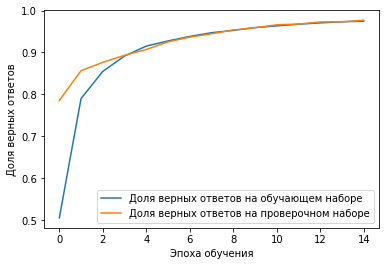

313/313 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9768


In [ ]:
# на всю выборку колаба не хватило. Поменял на 15000
batch_size = 15000

model = Sequential()
model.add(BatchNormalization(input_shape = (28,28,1)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs=15,
                    validation_data = (x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], label = 'Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label = 'Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

indexes.append('batch_size = 15000')
model_list.append(history.history['accuracy'][-1])
model_list.append(history.history['val_accuracy'][-1])

scores = model.evaluate(x_test, y_test)
model_list.append(scores[1])

In [ ]:
model_arr = np.array(model_list)
model_arr = model_arr.reshape(7,3)
df = pd.DataFrame(model_arr, columns=columns, index=indexes)
df

,accuracy,val_accuracy,test_accuracy
1 слой 2 нейрона,0.972200,0.9824,0.9824
1 слой 4 нейрона,0.987000,0.9880,0.9880
1 слой 16 нейрона,0.994583,0.9892,0.9892
relu - > linear,0.984333,0.9774,0.9774
batch_size = 10,0.997583,0.9910,0.9910
batch_size = 100,0.997800,0.9915,0.9915
batch_size = 15000,0.974550,0.9768,0.9768


### Выводы

- снижение количества нейронов приводит к ухудшению качества сети. Не хватает для запоминания всех признаков
- смена функции с релу на линейную ухудшило качество сети - нейроны без акцтивации не успели за 15 эпох обучиться признакам
- увеличение batch_size привело к ухудшению сети. При обучении большими объемами признаки больше усредняются и сеть обучается на более усредненных значениях на каждой эпохе

# ПРО

## вар 2

изменения:
- немного поменля структуру, поменял значения в дропаутах
- нормализовал данные
- добавил image generator
- 400 эпох сделал с запасом, можно было меньшим обойтись ( но не стал переучивать)

In [ ]:
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()
x_train10.shape

170500096/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_train10 = x_train10/255.

In [ ]:
x_test10 = x_test10/255

In [ ]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [ ]:
y_train10 = utils.to_categorical(y_train10,10)
y_test10 = utils.to_categorical(y_test10,10)

In [ ]:
x_train10new, x_val10, y_train10new, y_val10 = train_test_split(x_train10, y_train10, test_size=0.2, shuffle=True)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/400
625/625 [==============================] - 27s 43ms/step - loss: 1.8512 - accuracy: 0.3715 - val_loss: 1.4813 - val_accuracy: 0.4885
Epoch 2/400
625/625 [==============================] - 27s 43ms/step - loss: 1.2953 - accuracy: 0.5348 - val_loss: 1.5213 - val_accuracy: 0.5196
Epoch 3/400
625/625 [==============================] - 27s 43ms/step - loss: 1.0804 - accuracy: 0.6168 - val_loss: 1.1246 - val_accuracy: 0.6239
Epoch 4/400
625/625 [==============================] - 27s 43ms/step - loss: 0.9716 - accuracy: 0.6587 - val_loss: 0.9159 - val_accuracy: 0.6755
Epoch 5/400
625/625 [==============================] - 27s 43ms/step - loss: 0.9008 - accuracy: 0.6870 - val_loss: 0.8515 - val_accuracy: 0.7162
Epoch 6/400
625/625 [==============================] - 27s 43ms/step - loss: 0.8425 - accuracy: 0.7085 - val_loss: 0.9188 - val_accuracy: 0.6958
Epoch 7/400
625/625 [==============================] -

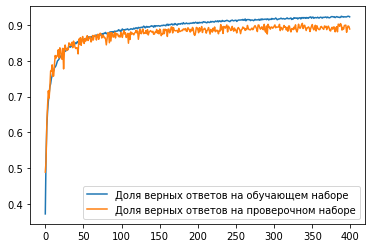

In [ ]:
batch_size = 64

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu',  padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, rotation_range=10, horizontal_flip=True)
it_train = datagen.flow(x_train10new, y_train10new, batch_size=batch_size)
steps = int(x_train10new.shape[0] / batch_size)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=400, validation_data=(x_val10, y_val10), verbose=1)

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(x_test10, y_test10, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.3979 - accuracy: 0.8806


In [ ]:
print('Точность модели на проверочной выборке = ', history.history['val_accuracy'][-1])
print('Точность модели на тестовой выборке = ', scores[1])

Точность модели на проверочной выборке =  0.8894000053405762
Точность модели на тестовой выборке =  0.8805999755859375
